In [1]:
%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy

In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [3]:
# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF0000')  # 设置使用的历史数据库
engine.setStartDate('20160101')               # 设置回测用的数据起始日期

In [4]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   
engine.setCapital(1000000)  # 设置回测本金

In [5]:
# 在引擎中创建策略对象
d = {'atrLength': 11}                     # 策略参数配置
engine.initStrategy(AtrRsiStrategy, d)    # 创建策略对象

In [6]:
# 运行回测
engine.runBacktesting()          # 运行回测

2017-07-14 20:10:59.807000	开始载入数据
2017-07-14 20:10:59.859000	载入完成，数据量：69994
2017-07-14 20:10:59.859000	开始回测
2017-07-14 20:10:59.872000	策略初始化完成
2017-07-14 20:10:59.872000	策略启动完成
2017-07-14 20:10:59.872000	开始回放数据
2017-07-14 20:11:04.727000	数据回放结束


2017-07-14 20:11:05.963000	计算按日统计结果
2017-07-14 20:11:05.981000	------------------------------
2017-07-14 20:11:05.981000	首个交易日：	2016-01-11
2017-07-14 20:11:05.982000	最后交易日：	2017-03-20
2017-07-14 20:11:05.982000	总交易日：	289
2017-07-14 20:11:05.982000	盈利交易日	146
2017-07-14 20:11:05.982000	亏损交易日：	143
2017-07-14 20:11:05.982000	起始资金：	1000000
2017-07-14 20:11:05.982000	结束资金：	973,109.83
2017-07-14 20:11:05.982000	总收益率：	-2.69
2017-07-14 20:11:05.982000	总盈亏：	-26,890.17
2017-07-14 20:11:05.982000	最大回撤: 	-162,300.57
2017-07-14 20:11:05.982000	总手续费：	28,270.17
2017-07-14 20:11:05.982000	总滑点：	60,300.0
2017-07-14 20:11:05.982000	总成交金额：	942,339,000.0
2017-07-14 20:11:05.982000	总成交笔数：	1,004.0
2017-07-14 20:11:05.982000	日均盈亏：	-93.05
2017-07-14 20:11:05.982000	日均手续费：	97.82
2017-07-14 20:11:05.982000	日均滑点：	208.65
2017-07-14 20:11:05.982000	日均成交金额：	3,260,688.58
2017-07-14 20:11:05.982000	日均成交笔数：	3.47
2017-07-14 20:11:05.982000	日均收益率：	-0.02%
2017-07-14 20:11:05.982000	收益标准差：	1.11%
2017-07-14 20:11:05.982000	S

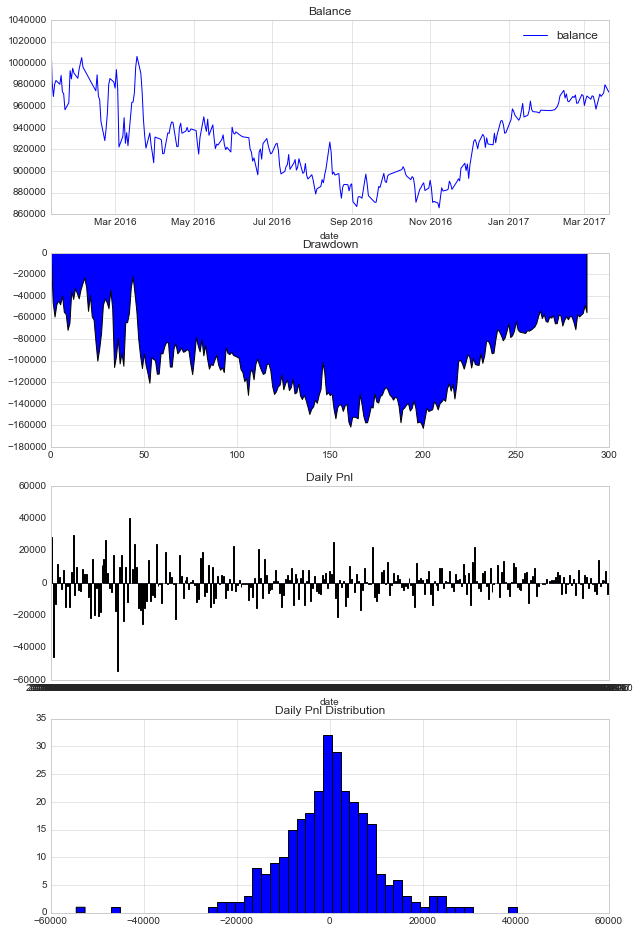

In [7]:
# 显示逐日回测结果
df = engine.showDailyResult()

2017-07-14 20:11:13.701000	计算回测结果
2017-07-14 20:11:13.722000	------------------------------
2017-07-14 20:11:13.722000	第一笔交易：	2016-01-11 09:33:00
2017-07-14 20:11:13.722000	最后一笔交易：	2017-03-20 15:00:00
2017-07-14 20:11:13.722000	总交易次数：	503.0
2017-07-14 20:11:13.722000	总盈亏：	-26,980.93
2017-07-14 20:11:13.722000	最大回撤: 	-160,499.28
2017-07-14 20:11:13.722000	平均每笔盈利：	-53.64
2017-07-14 20:11:13.722000	平均每笔滑点：	120.0
2017-07-14 20:11:13.722000	平均每笔佣金：	56.26
2017-07-14 20:11:13.722000	胜率		38.17%
2017-07-14 20:11:13.722000	盈利交易平均值	7,882.85
2017-07-14 20:11:13.722000	亏损交易平均值	-4,953.34
2017-07-14 20:11:13.722000	盈亏比：	1.59


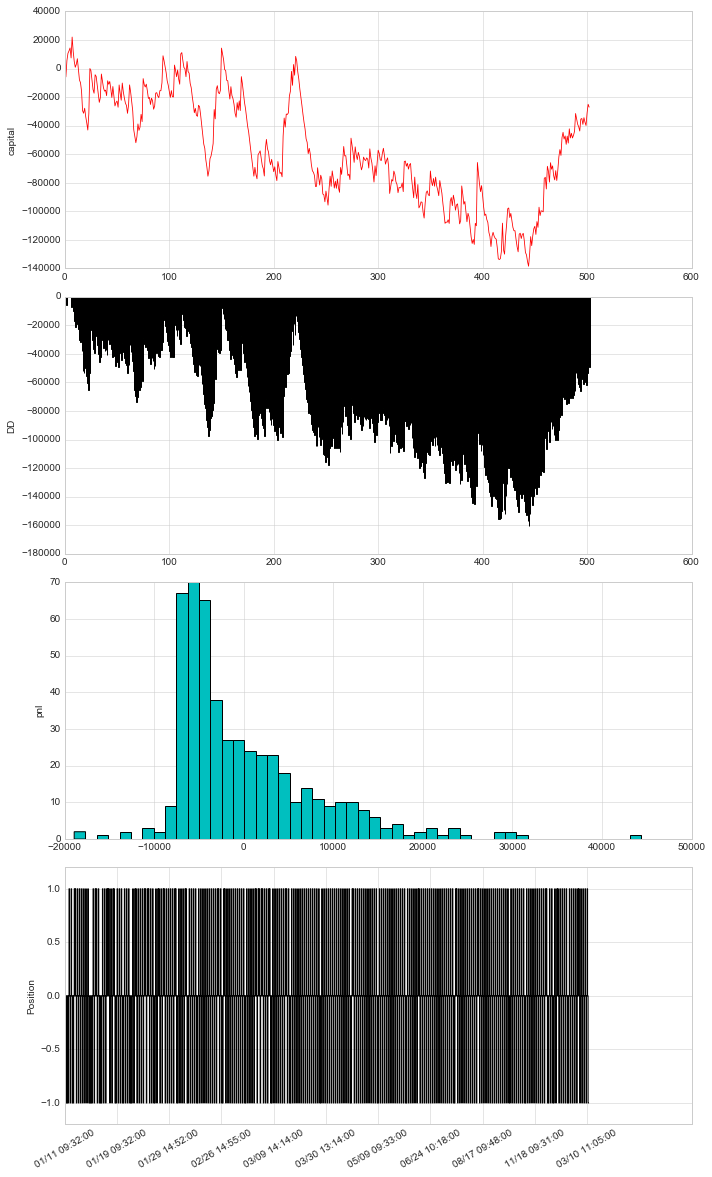

In [8]:
# 显示逐笔回测结果
engine.showBacktestingResult()

In [ ]:
# 显示前10条成交记录
for i in range(10):
    print engine.tradeDict[str(i+1)].__dict__

In [ ]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('capital')            # 设置优化排序的目标是策略净盈利
setting.addParameter('atrLength', 12, 20, 2)    # 增加第一个优化参数atrLength，起始12，结束20，步进2
setting.addParameter('atrMa', 20, 30, 5)        # 增加第二个优化参数atrMa，起始20，结束30，步进5
setting.addParameter('rsiLength', 5)            # 增加一个固定数值的参数

# 执行多进程优化
import time
engine.runParallelOptimization(AtrRsiStrategy, setting)
print u'耗时：%s' %(time.time()-start)